In [135]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import os
import sys
import numpy as np
from scipy.stats import linregress
import seaborn as sns

csv0 = '../Presentation/clean/clean_od15.csv'
clean_od_2015 = pd.read_csv(csv0)

csv1 = '../Presentation/clean/clean_od16.csv'
clean_od_2016 = pd.read_csv(csv1)

csv2 = "../Presentation/clean/PAC_Scores_2015_group.csv"
PAC_group_2015 = pd.read_csv(csv2)

csv3 = "../Presentation/clean/PAC_Scores_2016_group.csv"
PAC_group_2016 = pd.read_csv(csv3)

csv4 = "../Presentation/Clean/op_pac_final_15.csv"
individual_pac_2015 = pd.read_csv(csv4)

csv5 = "../Presentation/Clean/op_pac_final_16.csv"
individual_pac_2016 = pd.read_csv(csv5)

csv6 = "../Presentation/Clean/state_op_final_15.csv"
state_individual_pac_2016 = pd.read_csv(csv6)

csv7 = "../Presentation/Clean/state_op_final_16.csv"
state_individual_pac_2016 = pd.read_csv(csv7)


In [136]:
clean_od_2015.head()

,Year,State,Year.1,Month,Total Deaths,Drug Deaths
0,2015,AK,2015,January,4034,126
1,2015,AK,2015,February,4084,127
2,2015,AK,2015,March,4101,125
3,2015,AK,2015,April,4133,126
4,2015,AK,2015,May,4196,125


In [137]:
clean_od_2016.head()

,Year,State,Year.1,Month,Total Deaths,Drug Deaths
0,2016,AK,2016,January,4213,126
1,2016,AK,2016,February,4198,128
2,2016,AK,2016,March,4230,125
3,2016,AK,2016,April,4262,132
4,2016,AK,2016,May,4241,140


In [138]:
od_state_2016 = pd.DataFrame(clean_od_2016.groupby(["State"])["Drug Deaths","Total Deaths"].sum())
od_state_2016.head()


,Drug Deaths,Total Deaths
State,,
AK,1594,51141
AL,8324,608611
AR,4513,366574
AZ,16403,679217
CA,57154,3139581


In [139]:
od_state_2015= pd.DataFrame(clean_od_2015.groupby(["State"])["Drug Deaths","Total Deaths"].sum())
od_state_2015.head()


,Drug Deaths,Total Deaths
State,,
AK,1472,50086
AL,8818,607641
AR,4616,368117
AZ,14590,642297
CA,56001,3056952


In [140]:
individual_pac_2015.head()

,PAC ID,Total Claim Count,Opioid Claim Count,Opioid Prescribing Rate,State
0,42100190.0,241.0,68.0,28.22,MI
1,42100273.0,232.0,22.0,9.48,TX
2,42101156.0,620.0,38.0,6.13,NV
3,42101164.0,336.0,56.0,16.67,MI
4,42101446.0,682.0,228.0,33.43,IL


In [141]:
#Create a table for individual pac by state for 2015
state_individual_pac15 = pd.DataFrame(individual_pac_2015.groupby(["State"])["Total Claim Count","Opioid Claim Count"].sum())
state_individual_pac15.head()
state_individual_pac15["Opioid Prescribing Rate"] = round(state_individual_pac15["Opioid Claim Count"] / state_individual_pac15["Total Claim Count"] *100,2)
state_individual_pac15.head()

,Total Claim Count,Opioid Claim Count,Opioid Prescribing Rate
State,,,
AK,22583.0,1560.0,6.91
AL,1924680.0,145984.0,7.58
AP,103.0,21.0,20.39
AR,742127.0,52842.0,7.12
AZ,661498.0,50874.0,7.69


In [142]:
#Create a table for individual pac by state for 2016
state_individual_pac16 = pd.DataFrame(individual_pac_2016.groupby(["State"])["Total Claim Count","Opioid Claim Count"].sum())
state_individual_pac16.head()
state_individual_pac16["Opioid Prescribing Rate"] = round(state_individual_pac16["Opioid Claim Count"] / state_individual_pac15["Total Claim Count"] *100,2)
state_individual_pac16.head()

,Total Claim Count,Opioid Claim Count,Opioid Prescribing Rate
State,,,
AK,8436.0,433.0,1.92
AL,908942.0,64247.0,3.34
AR,562795.0,30750.0,4.14
AZ,820879.0,43630.0,6.60
CA,3337755.0,179709.0,5.15


In [143]:
#merge our clean_od_2015 with our state_individual_pac15
merged_state_individual_pac15 = state_individual_pac15.merge(od_state_2015, on="State", how="outer")
print(len(merged_state_individual_pac15))
merged_state_individual_pac15.head()

56


,Total Claim Count,Opioid Claim Count,Opioid Prescribing Rate,Drug Deaths,Total Deaths
State,,,,,
AK,22583.0,1560.0,6.91,1472.0,50086.0
AL,1924680.0,145984.0,7.58,8818.0,607641.0
AP,103.0,21.0,20.39,NaN,NaN
AR,742127.0,52842.0,7.12,4616.0,368117.0
AZ,661498.0,50874.0,7.69,14590.0,642297.0


In [144]:
#merge our clean_od_2016 with our state_individual_pac16
merged_state_individual_pac16 = state_individual_pac16.merge(od_state_2016, on="State", how="outer")
print(len(merged_state_individual_pac16))
merged_state_individual_pac16.head()

55


,Total Claim Count,Opioid Claim Count,Opioid Prescribing Rate,Drug Deaths,Total Deaths
State,,,,,
AK,8436.0,433.0,1.92,1594.0,51141.0
AL,908942.0,64247.0,3.34,8324.0,608611.0
AR,562795.0,30750.0,4.14,4513.0,366574.0
AZ,820879.0,43630.0,6.60,16403.0,679217.0
CA,3337755.0,179709.0,5.15,57154.0,3139581.0


In [153]:
#dropped rows with null from our merged files in 2015
merged_state_individual_pac15 = merged_state_individual_pac15.dropna(axis=0, how='any')
print(len(merged_state_individual_pac15))
merged_state_individual_pac15.head()

51


,Total Claim Count,Opioid Claim Count,Opioid Prescribing Rate,Drug Deaths,Total Deaths
State,,,,,
AK,22583.0,1560.0,6.91,1472.0,50086.0
AL,1924680.0,145984.0,7.58,8818.0,607641.0
AR,742127.0,52842.0,7.12,4616.0,368117.0
AZ,661498.0,50874.0,7.69,14590.0,642297.0
CA,3486417.0,226791.0,6.50,56001.0,3056952.0


In [154]:
barplot_state15=merged_state_individual_pac15.reset_index()

In [159]:
barplot_state15['Opioid Prescribing Rate'].max()

12.79

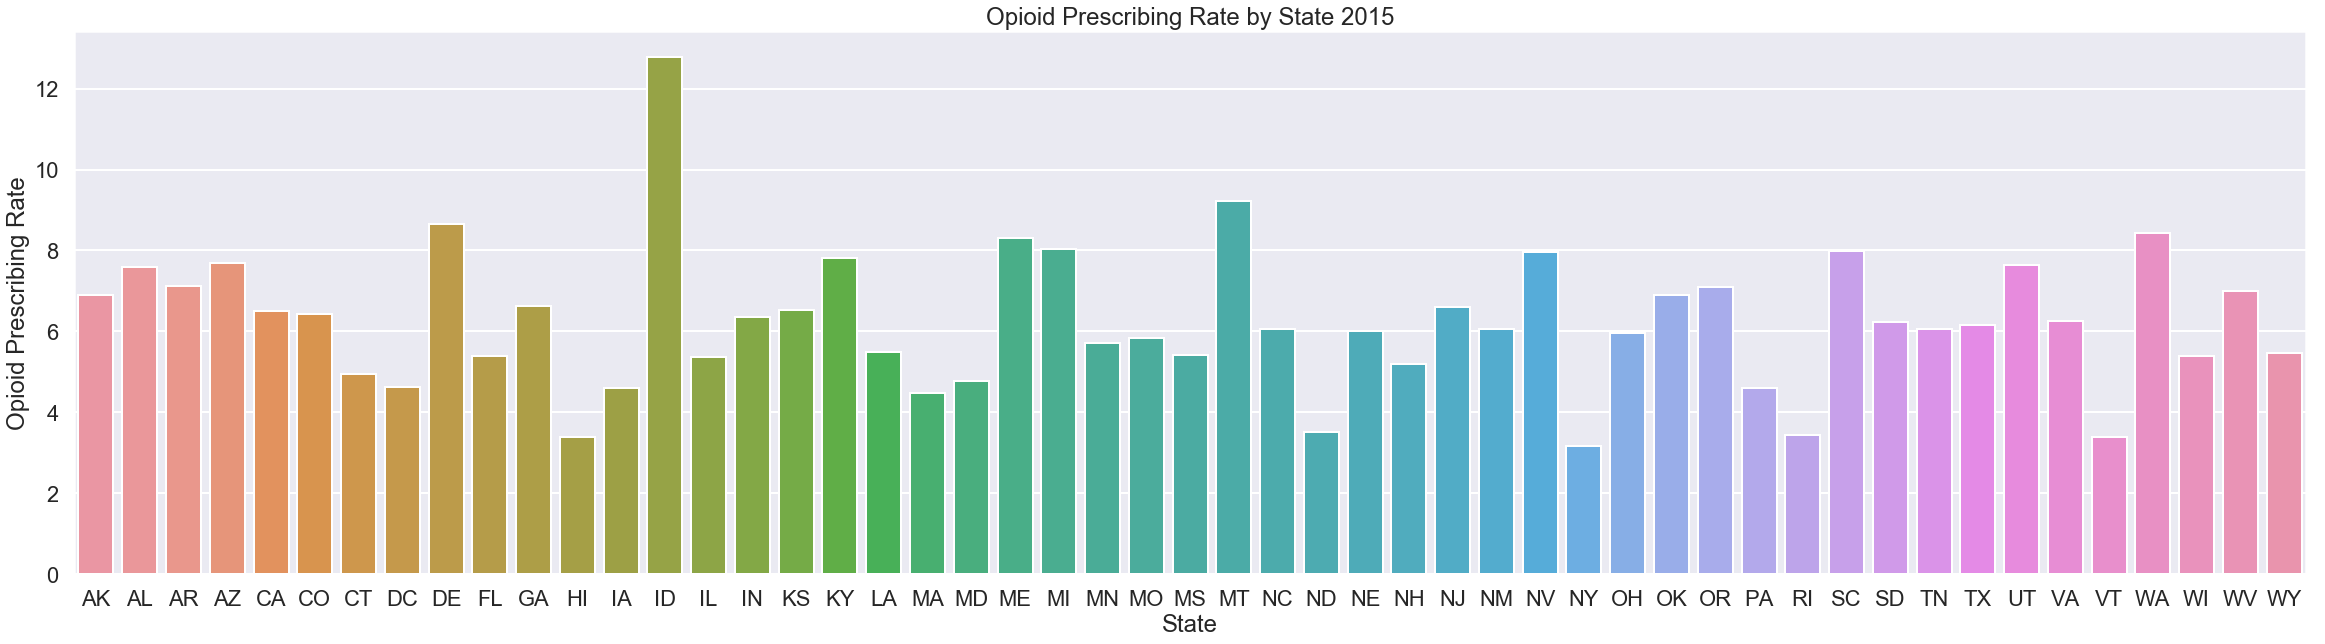

In [160]:

plt.figure(figsize=(40,10))
sns.set_style('darkgrid')
sns.set_context('poster')
plt.title('Opioid Prescribing Rate by State 2015')
sns.barplot(x=barplot_state15['State'],y=barplot_state15['Opioid Prescribing Rate'])

plt.savefig('../Presentation/graphs/state_barplot15.png')

In [156]:
#dropped rows with null from our merged files in 2016
merged_state_individual_pac16 = merged_state_individual_pac16.dropna(axis=0, how='any')
print(len(merged_state_individual_pac16))
merged_state_individual_pac16.head()


51


,Total Claim Count,Opioid Claim Count,Opioid Prescribing Rate,Drug Deaths,Total Deaths
State,,,,,
AK,8436.0,433.0,1.92,1594.0,51141.0
AL,908942.0,64247.0,3.34,8324.0,608611.0
AR,562795.0,30750.0,4.14,4513.0,366574.0
AZ,820879.0,43630.0,6.60,16403.0,679217.0
CA,3337755.0,179709.0,5.15,57154.0,3139581.0


In [157]:
barplot_state = merged_state_individual_pac16.reset_index()
barplot_state.head()

,State,Total Claim Count,Opioid Claim Count,Opioid Prescribing Rate,Drug Deaths,Total Deaths
0,AK,8436.0,433.0,1.92,1594.0,51141.0
1,AL,908942.0,64247.0,3.34,8324.0,608611.0
2,AR,562795.0,30750.0,4.14,4513.0,366574.0
3,AZ,820879.0,43630.0,6.60,16403.0,679217.0
4,CA,3337755.0,179709.0,5.15,57154.0,3139581.0


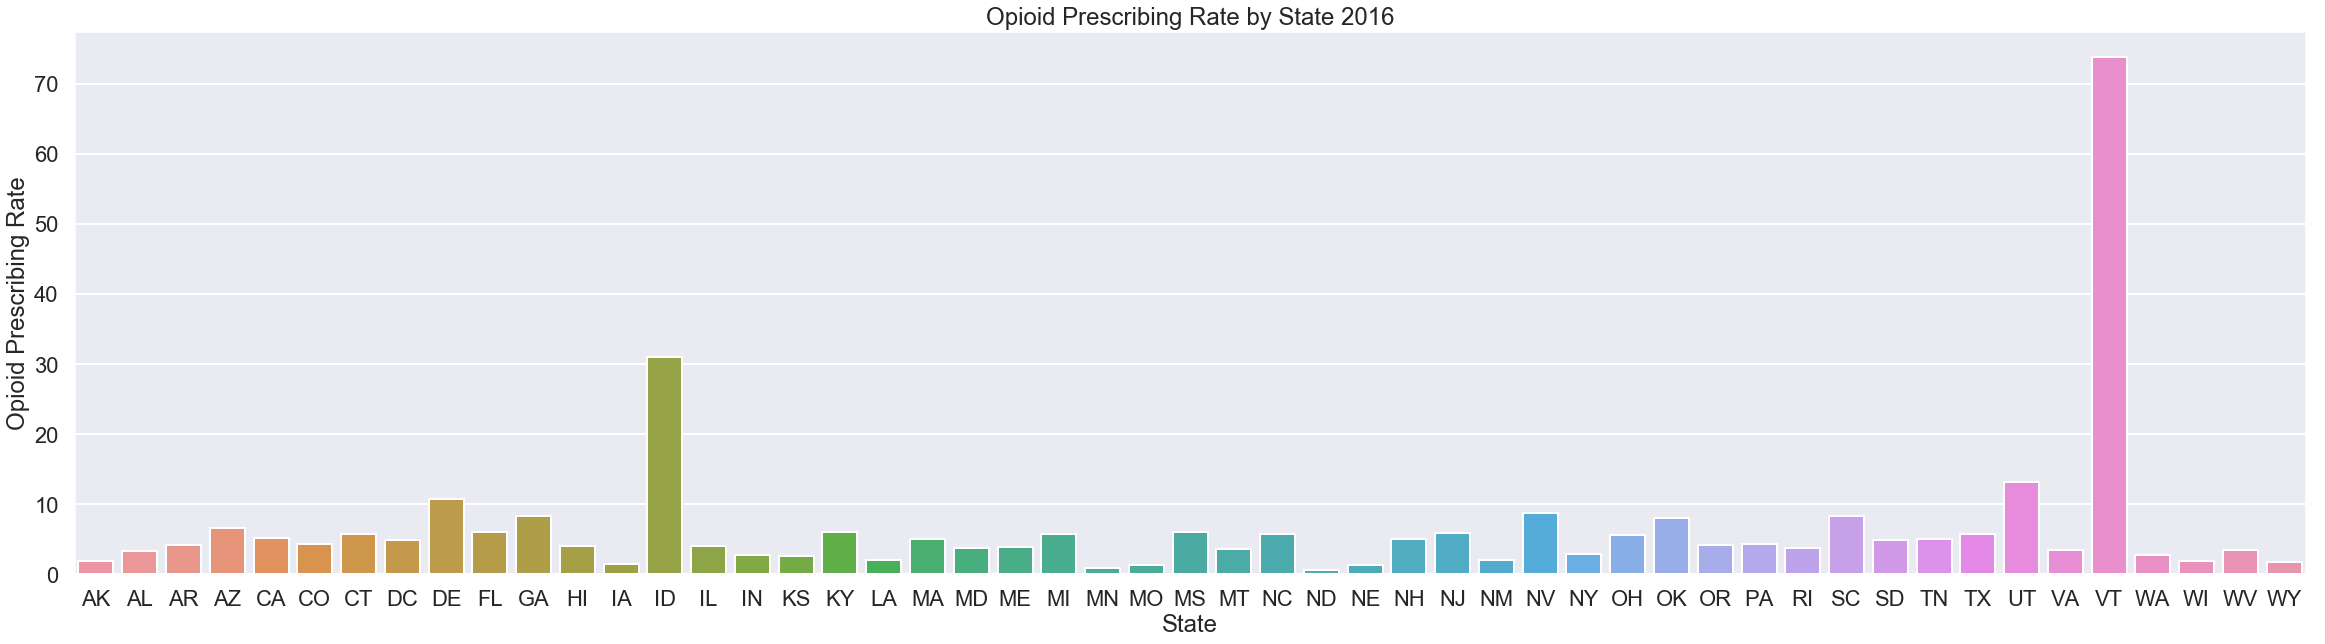

In [162]:
#####
plt.figure(figsize=(40,10))
sns.set_style('darkgrid')
sns.set_context('poster')
plt.title('Opioid Prescribing Rate by State 2016')
sns.barplot(x=barplot_state['State'],y=barplot_state['Opioid Prescribing Rate'])

plt.savefig('../Presentation/graphs/state_barplot16.png')

In [106]:
#Sort data for two outliers
merged_state_individual_pac16 = merged_state_individual_pac16.sort_values('Opioid Prescribing Rate',ascending=False)
merged_state_individual_pac16.head()

,Total Claim Count,Opioid Claim Count,Opioid Prescribing Rate,Drug Deaths,Total Deaths
State,,,,,
VT,25273.0,1763.0,73.86,1363.0,68688.0
ID,112843.0,18672.0,31.00,2623.0,157810.0
UT,109302.0,7158.0,13.10,8333.0,219344.0
DE,64342.0,2572.0,10.68,2724.0,103860.0
NV,332670.0,25794.0,8.70,8457.0,291104.0


In [107]:
#drop VT and ID who had high prescriber rates, outliers
merged_state_individual_pac16 = merged_state_individual_pac16.drop(["VT","ID"], axis=0)
merged_state_individual_pac16.head()

,Total Claim Count,Opioid Claim Count,Opioid Prescribing Rate,Drug Deaths,Total Deaths
State,,,,,
UT,109302.0,7158.0,13.10,8333.0,219344.0
DE,64342.0,2572.0,10.68,2724.0,103860.0
NV,332670.0,25794.0,8.70,8457.0,291104.0
SC,736906.0,54782.0,8.29,9569.0,558101.0
GA,2214588.0,138769.0,8.27,15538.0,969526.0


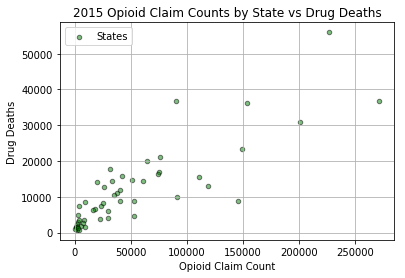

In [108]:
#Plot Opioid Claim Counts of Group PAC by State vs Drug Deaths for 2015
merged_state_individual_pac15.plot.scatter(x="Opioid Claim Count", y='Drug Deaths', color='Green', 
                                           grid=True, alpha=0.5, edgecolors = 'black', label='States')
#Add title to our scatter plot along with an x-axis and y-axis title
plt.title("2015 Opioid Claim Counts by State vs Drug Deaths")
plt.xlabel("Opioid Claim Count")
plt.ylabel("Drug Deaths")

#plt.savefig("../Presentation/graphs/")

plt.show()


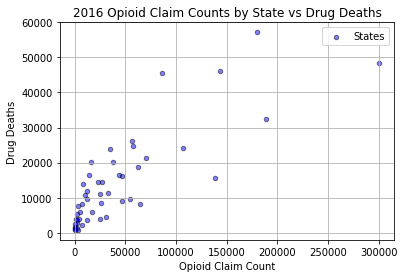

In [109]:
#Plot Opioid Claim Counts of Group PAC by State vs Drug Deaths for 2016
merged_state_individual_pac16.plot.scatter(x="Opioid Claim Count", y='Drug Deaths', color='Blue',
              grid=True, alpha=0.5, edgecolors = 'black', label='States')
#Add title to our scatter plot along with an x-axis and y-axis title
plt.title("2016 Opioid Claim Counts by State vs Drug Deaths")
plt.xlabel("Opioid Claim Count")
plt.ylabel("Drug Deaths")

plt.show()


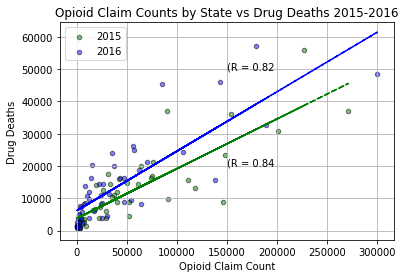

In [126]:
#Combined Chart for 2015 and 2016 for Opioid Claims vs  Drug Deaths
#Plot Opioid Claim Counts of Individual PAC by State vs Drug Deaths for 2015
ax = merged_state_individual_pac15.plot.scatter(x="Opioid Claim Count", y='Drug Deaths', color='Green', 
                                           grid=True, alpha=0.5, edgecolors = 'black', label='2015')
#setting axis for 2015
x_axis15 = merged_state_individual_pac15["Opioid Claim Count"]
y_axis15 = merged_state_individual_pac15["Drug Deaths"]

#Regression line for 2015
slope, intercept, r_value, p_value, std_err = linregress(x_axis15,y_axis15)
fit = slope * x_axis15 + intercept
plt.plot(x_axis15, fit, 'g--', label="Regression Line 2015")

#R Value for 2015
stat_value = '(R = ' + str(round(r_value,2)) 
plt.text(150000, 20000, stat_value)

#Plot Opioid Claim Counts of Individual PAC by State vs Drug Deaths for 2016
merged_state_individual_pac16.plot.scatter(x="Opioid Claim Count", y='Drug Deaths', color='Blue',
              grid=True, alpha=0.5, edgecolors = 'black', label='2016', ax=ax)

#setting axis for 2016
x_axis16 = merged_state_individual_pac16["Opioid Claim Count"]
y_axis16 = merged_state_individual_pac16["Drug Deaths"]

#Regression line for 2016
slope, intercept, r_value, p_value, std_err = linregress(x_axis16,y_axis16)
fit = slope * x_axis16 + intercept
plt.plot(x_axis16, fit, 'b--', label="Regression Line 2016")

#R Value for 2016
stat_value = '(R = ' + str(round(r_value,2)) 
plt.text(150000, 50000, stat_value)

#Add title to our scatter plot along with an x-axis and y-axis title
plt.title("Opioid Claim Counts by State vs Drug Deaths 2015-2016")
plt.xlabel("Opioid Claim Count")
plt.ylabel("Drug Deaths")

plt.savefig("../Presentation/graphs/opioid_claims_vs_drugdeaths.png")

plt.show()

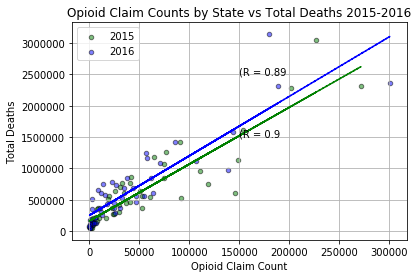

In [133]:
#Combined Chart for 2015 and 2016 for Opioid Claims vs  Total Deaths
#Plot Opioid Claim Counts of Individual PAC by State vs Total Deaths for 2015
ax = merged_state_individual_pac15.plot.scatter(x="Opioid Claim Count", y='Total Deaths', color='Green', 
                                           grid=True, alpha=0.5, edgecolors = 'black', label='2015')

#setting axis for 2015
x_axis15 = merged_state_individual_pac15["Opioid Claim Count"]
y_axis15 = merged_state_individual_pac15["Total Deaths"]

#Regression line for 2015
slope, intercept, r_value, p_value, std_err = linregress(x_axis15,y_axis15)
fit = slope * x_axis15 + intercept
plt.plot(x_axis15, fit, 'g--', label="Regression Line 2015")

#R Value for 2015
stat_value = '(R = ' + str(round(r_value,2)) 
plt.text(150000, 1500000, stat_value)

#Plot Opioid Claim Counts of Individual PAC by State vs Drug Deaths for 2016
merged_state_individual_pac16.plot.scatter(x="Opioid Claim Count", y='Total Deaths', color='Blue',
              grid=True, alpha=0.5, edgecolors = 'black', label='2016', ax=ax)

#setting axis for 2016
x_axis16 = merged_state_individual_pac16["Opioid Claim Count"]
y_axis16 = merged_state_individual_pac16["Total Deaths"]

#Regression line for 2016
slope, intercept, r_value, p_value, std_err = linregress(x_axis16,y_axis16)
fit = slope * x_axis16 + intercept
plt.plot(x_axis16, fit, 'b--', label="Regression Line 2016")

#R Value for 2016
stat_value = '(R = ' + str(round(r_value,2)) 
plt.text(150000, 2500000, stat_value)

#Add title to our scatter plot along with an x-axis and y-axis title
plt.title("Opioid Claim Counts by State vs Total Deaths 2015-2016")
plt.xlabel("Opioid Claim Count")
plt.ylabel("Total Deaths")

plt.savefig("../Presentation/graphs/opioid_claims_vs_totaldeaths.png")

plt.show()

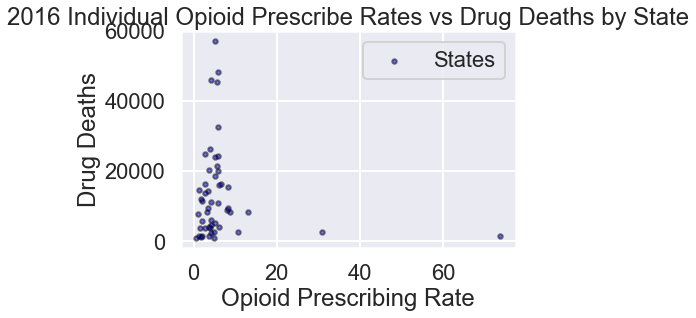

In [170]:
#Plot our Average Prescribed Rates of Individual PACs by State vs Drug Deaths for 2016
merged_state_individual_pac16.plot.scatter(x="Opioid Prescribing Rate", y='Drug Deaths', color='Blue', 
                                           grid=True, alpha=0.5, edgecolors = 'black', label='States')
#Add title to our scatter plot along with an x-axis and y-axis title
plt.title("2016 Individual Opioid Prescribe Rates vs Drug Deaths by State")
plt.xlabel("Opioid Prescribing Rate")
plt.ylabel("Drug Deaths")

plt.show()


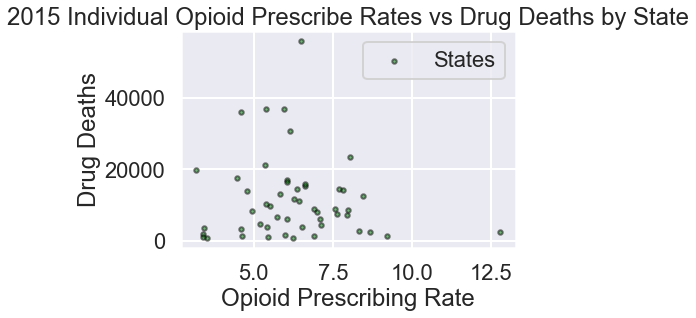

In [166]:
#Plot our Average Prescribed Rates of Individual PACs by State vs Drug Deaths for 2015
merged_state_individual_pac15.plot.scatter(x="Opioid Prescribing Rate", y='Drug Deaths', color='Green', 
                                           grid=True, alpha=0.5, edgecolors = 'black', label='States')
#Add title to our scatter plot along with an x-axis and y-axis title
plt.title("2015 Individual Opioid Prescribe Rates vs Drug Deaths by State")
plt.xlabel("Opioid Prescribing Rate")
plt.ylabel("Drug Deaths")

plt.show()

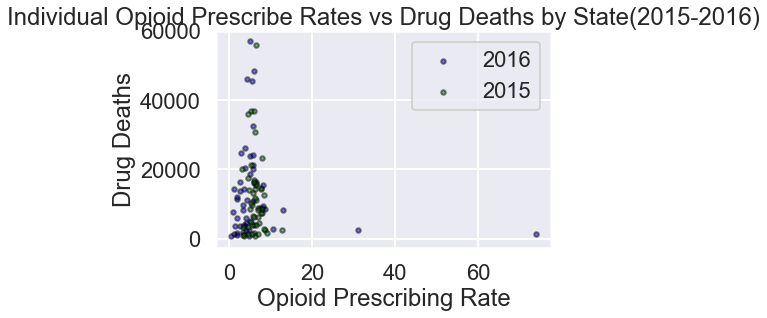

In [169]:
#Combined Plote of Avg Prescribed Rates of Individual PACs by state vs Drug Deaths for 2015 and 2016
#Plot our Average Prescribed Rates of Individual PACs by State vs Drug Deaths for 2016
ax = merged_state_individual_pac16.plot.scatter(x="Opioid Prescribing Rate", y='Drug Deaths', color='Blue', 
                                           grid=True, alpha=0.5, edgecolors = 'black', label='2016')
#Plot our Average Prescribed Rates of Individual PACs by State vs Drug Deaths for 2015
merged_state_individual_pac15.plot.scatter(x="Opioid Prescribing Rate", y='Drug Deaths', color='Green', 
                                           grid=True, alpha=0.5, edgecolors = 'black', label='2015', ax=ax)
#Add title to our scatter plot along with an x-axis and y-axis title
plt.title("Individual Opioid Prescribe Rates vs Drug Deaths by State(2015-2016)")
plt.xlabel("Opioid Prescribing Rate")
plt.ylabel("Drug Deaths")

plt.savefig("../Presentation/graphs/individual_opioid_prescribed_rates_vs_drugdeaths.png")

plt.show()